In [1]:
%reset -f

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import matplotlib
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import matplotlib.pyplot as plt

import seaborn as sns

import pickle, time, random, os, warnings, sys
sys.path.append('/home/d/dlr10/Documents/02_Statitics_modelling/0_FunctionsScripts')
import Learning_Curves_Functions as LearningCurves

from matplotlib.ticker import FixedFormatter
import seaborn as sns

from sklearn import metrics


2023-10-11 00:22:20.601569: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-11 00:22:20.601617: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
path = r'/home/d/dlr10/Documents/02_Statitics_modelling/4_Modelling_TS'

folders = ['10_','12_','11_']
varbles = ['CURB', 'LOS', 'EWS']
dat_chn = ['All', 'u_65', 'o_65']
models_ = ['SVM','XGB','LSTM', 'GRU']

In [4]:
#Y_valid = y_test
#y_predict = y_test_predict
#y_pred_proba = y_test_predict
def results_multiclass_gradientrow(Y_valid, y_predict, y_pred_proba, label_classes,  save = True, name = None):
    cm = metrics.confusion_matrix(Y_valid, y_predict)
    # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
    cm_df_ = pd.DataFrame(cm, index = label_classes, columns = label_classes)
    cm_df = 100*cm_df_ / len(Y_valid)
    cm_df = cm_df_.copy()
    cm_annot = np.array([["{:.2f}%".format(x) for x in item] for item in np.array(cm_df)])
    cm_annot = np.array([["{:.0f}".format(x) for x in item] for item in np.array(cm_df)])

    b = np.argsort(np.argsort(cm, axis=1), axis=1)

    plt.figure(figsize=(9,8))
    c_map = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
    im = plt.imshow(b, aspect="auto", cmap=c_map)
    #'plt.colorbar(im, ticks=np.array([0.0, 0.5, 1.0])*b.max(), format=FixedFormatter(["small", "middle", "high"]))
    ax = plt.gca()
    # Major ticks
    ax.set_xticks(np.arange(0, len(label_classes), 1))
    ax.set_yticks(np.arange(0, len(label_classes), 1))

    # Labels for major ticks
    ax.set_xticklabels(label_classes, size = 25, ha = 'center')
    ax.set_yticklabels(label_classes, size = 25, rotation = 90, va = 'center')

    # Minor ticks
    ax.set_xticks(np.arange(-0.5, len(label_classes), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(label_classes), 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='k', linestyle='-', linewidth=2)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if b[i,j] >= int(len(label_classes)/2):
                plt.text(j,i,cm[i,j], ha="center", va="center", fontsize = 30, color  = 'w')
            else:
                plt.text(j,i,cm[i,j], ha="center", va="center", fontsize = 30)
    plt.ylabel('Real Values', fontsize = 30)
    plt.xlabel('Predicted Values', fontsize = 30)
    if save:plt.savefig("cm_" + name + '.png', transparent = True, bbox_inches = "tight")
    plt.show()
                
    return cm_df_

========= CURB_All_SVM =========


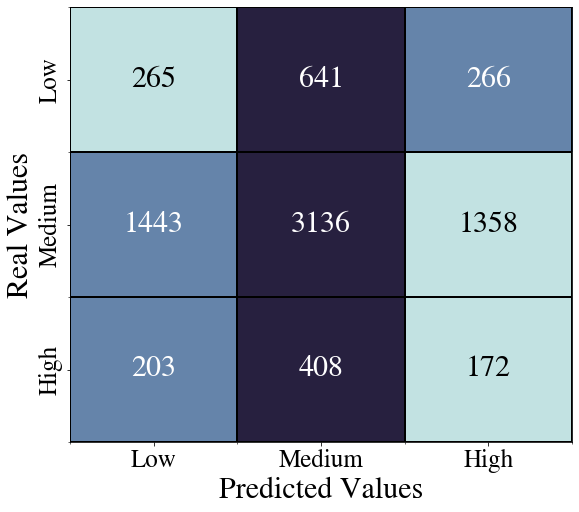

========= CURB_All_XGB =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:22:28] WARNING: /workspace/src/common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


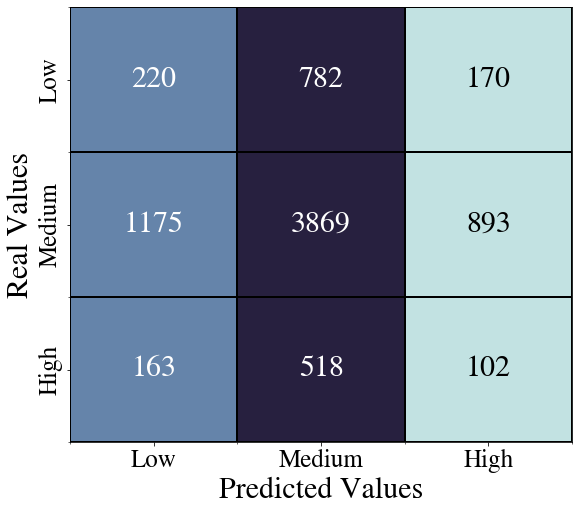

========= CURB_All_LSTM =========


2023-10-11 00:22:36.763258: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-11 00:22:36.763296: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-11 00:22:36.763322: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alice-login04): /proc/driver/nvidia/version does not exist
2023-10-11 00:22:36.763541: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-11 00:22:37.163510: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR 

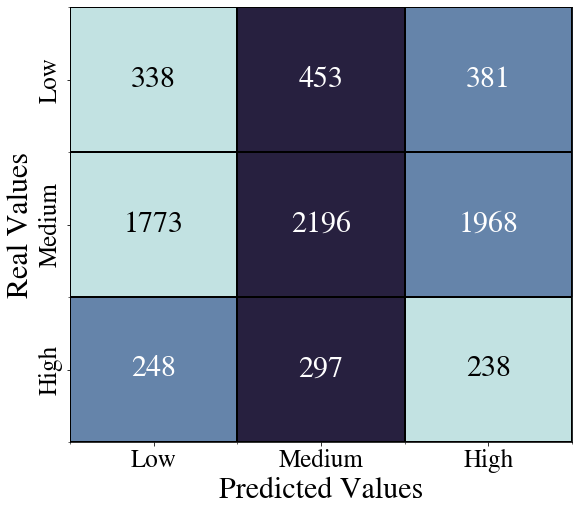

========= CURB_All_GRU =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


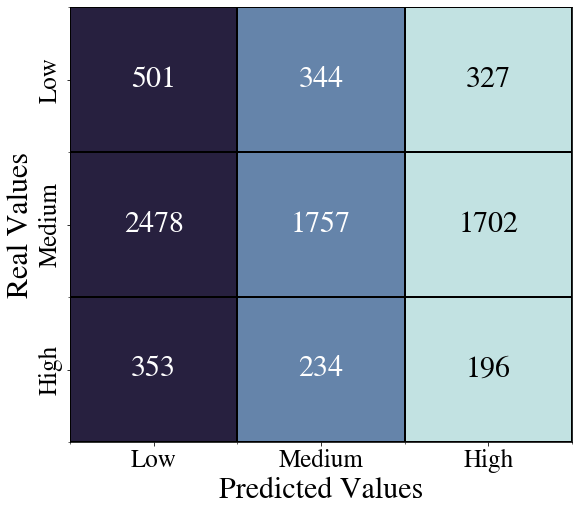

========= CURB_u_65_SVM =========


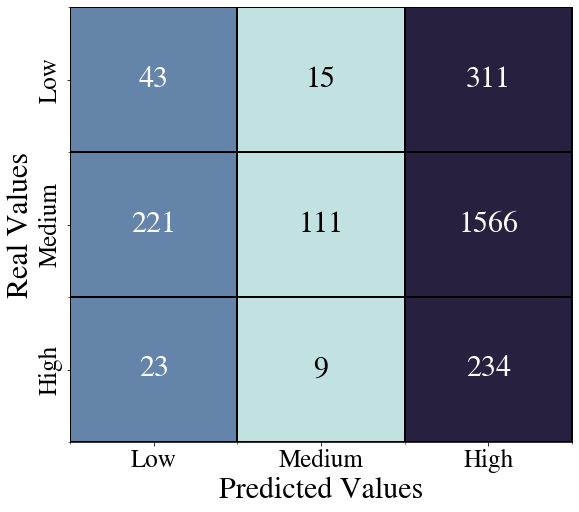

========= CURB_u_65_XGB =========


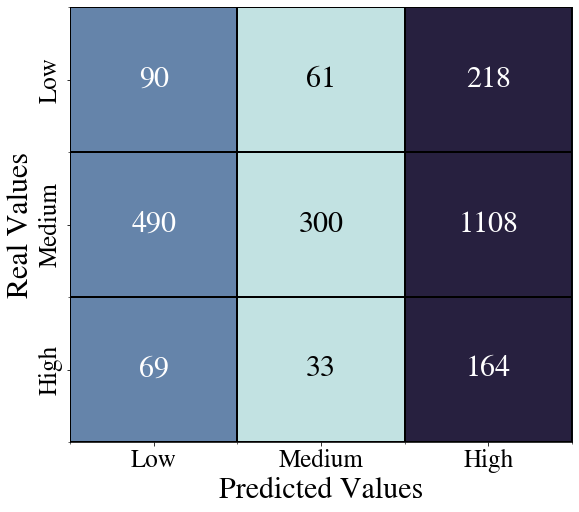

========= CURB_u_65_LSTM =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


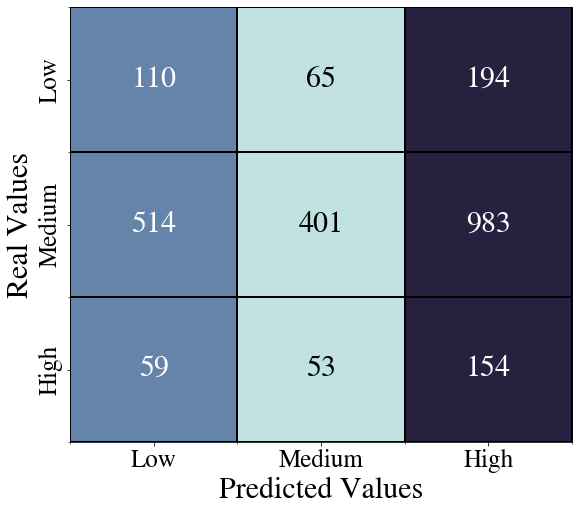

========= CURB_u_65_GRU =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


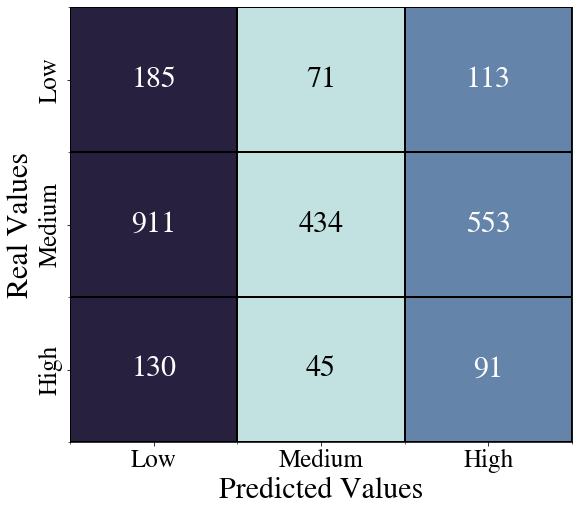

========= CURB_o_65_SVM =========


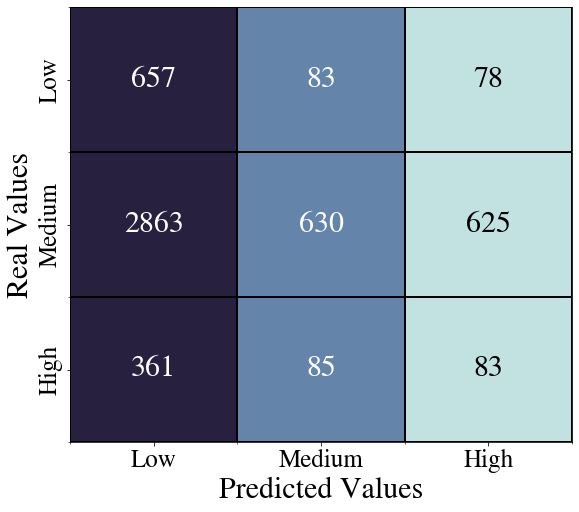

========= CURB_o_65_XGB =========


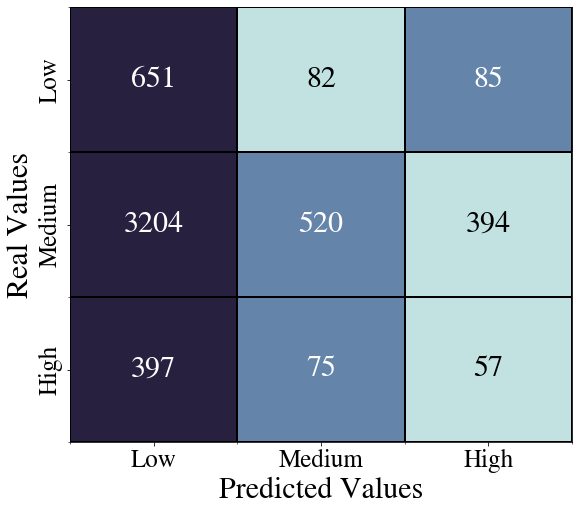

========= CURB_o_65_LSTM =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


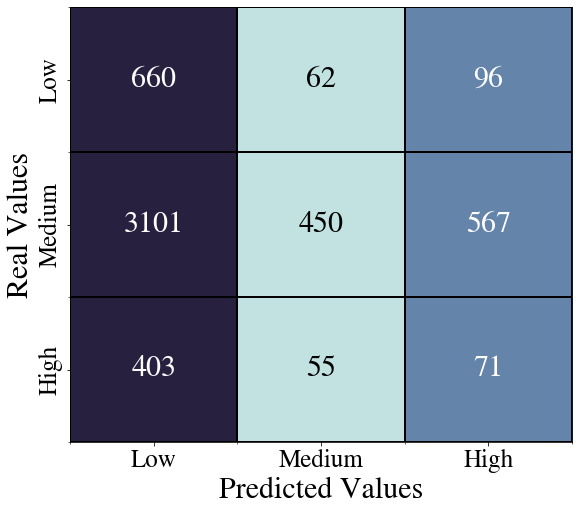

========= CURB_o_65_GRU =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


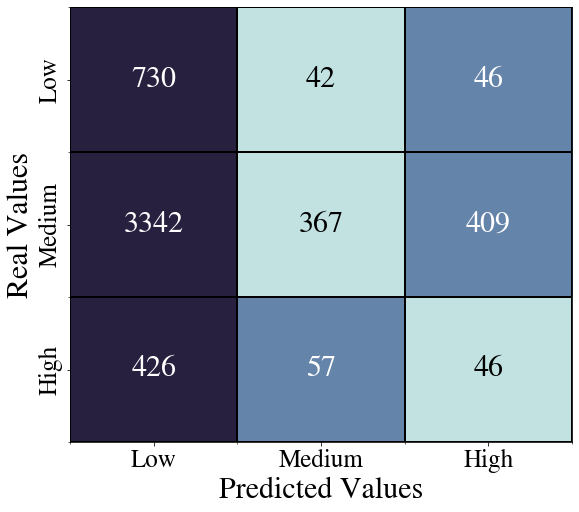

,Low,Medium,High,sum_real,sum_pred,Low,Medium,High,sum_real,sum_pred,name
Low,265,641,266,1172,1911,0.033578,0.081221,0.033705,0.148505,0.242144,CURB_All_SVM
Medium,1443,3136,1358,5937,4185,0.182843,0.397364,0.172073,0.752281,0.530284,CURB_All_SVM
High,203,408,172,783,1796,0.025722,0.051698,0.021794,0.099214,0.227572,CURB_All_SVM
Low,220,782,170,1172,1558,0.027876,0.099088,0.021541,0.148505,0.197415,CURB_All_XGB
Medium,1175,3869,893,5937,5169,0.148885,0.490243,0.113153,0.752281,0.654967,CURB_All_XGB
High,163,518,102,783,1165,0.020654,0.065636,0.012924,0.099214,0.147618,CURB_All_XGB
Low,338,453,381,1172,2359,0.042828,0.057400,0.048277,0.148505,0.298910,CURB_All_LSTM
Medium,1773,2196,1968,5937,2946,0.224658,0.278256,0.249366,0.752281,0.373289,CURB_All_LSTM
High,248,297,238,783,2587,0.031424,0.037633,0.030157,0.099214,0.327800,CURB_All_LSTM
Low,501,344,327,1172,3332,0.063482,0.043588,0.041434,0.148505,0.422200,CURB_All_GRU


========= LOS_All_SVM =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.3.0 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


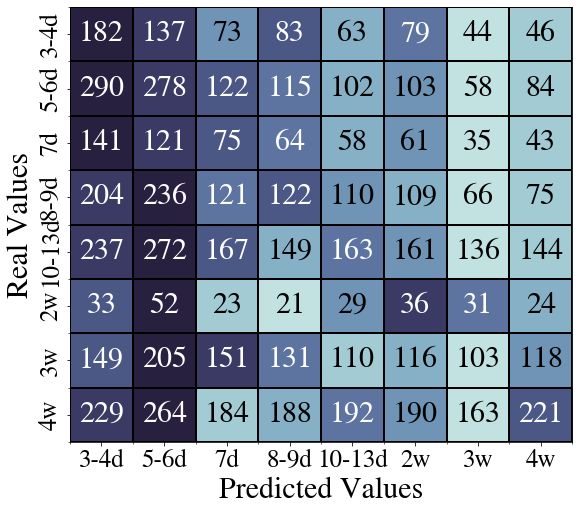

========= LOS_All_XGB =========


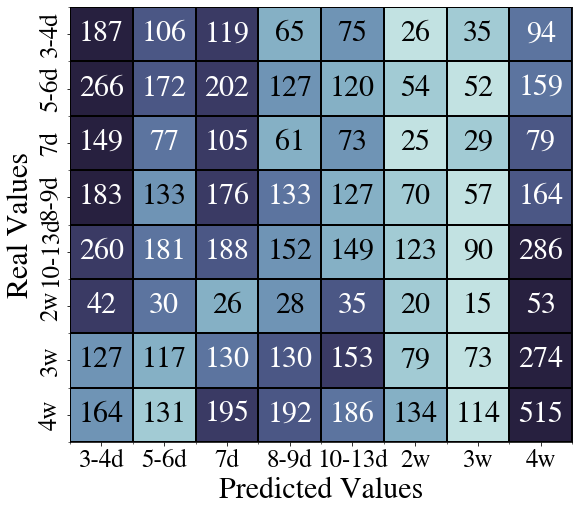

========= LOS_All_LSTM =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


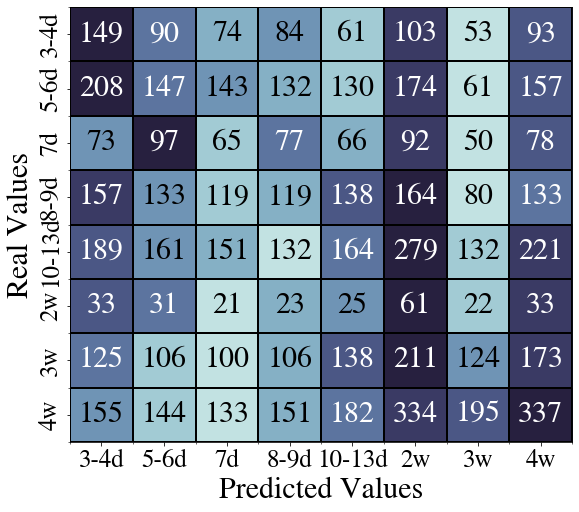

========= LOS_All_GRU =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


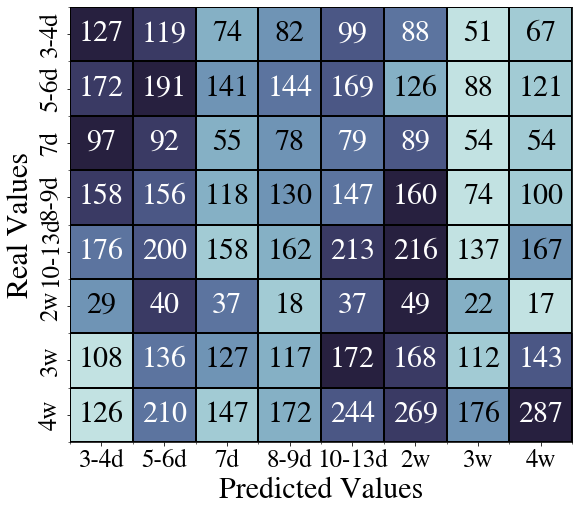

========= LOS_u_65_SVM =========


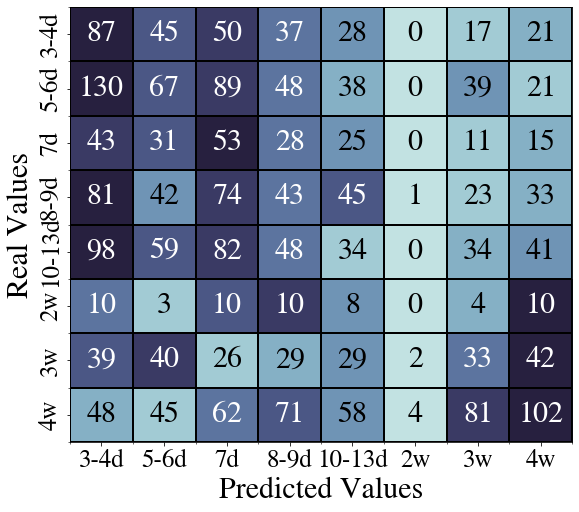

========= LOS_u_65_XGB =========


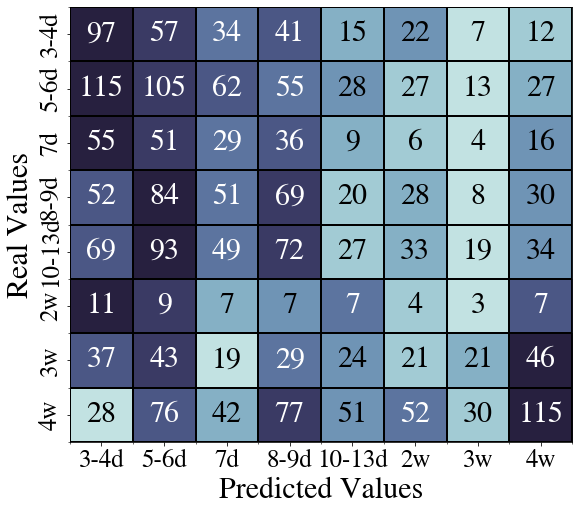

========= LOS_u_65_LSTM =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


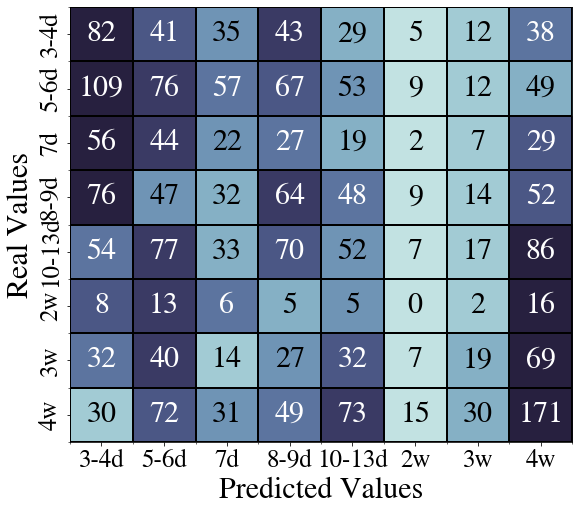

========= LOS_u_65_GRU =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


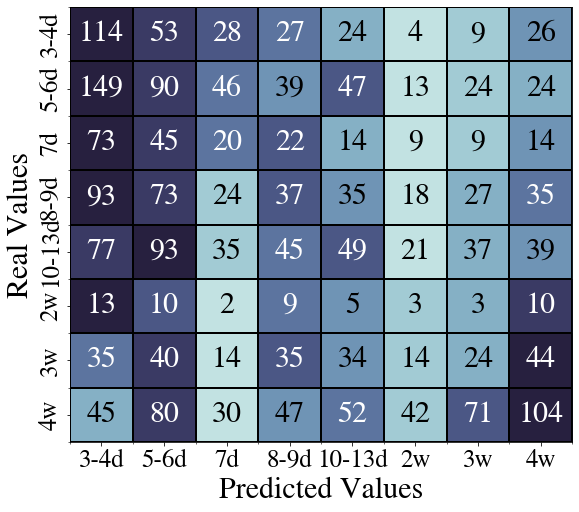

========= LOS_o_65_SVM =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


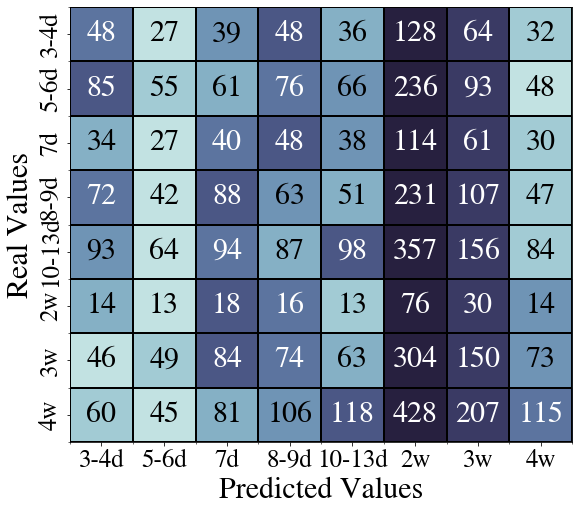

========= LOS_o_65_XGB =========


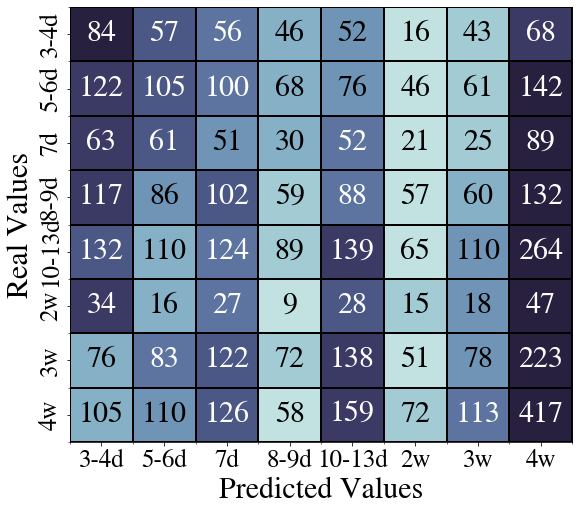

========= LOS_o_65_LSTM =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


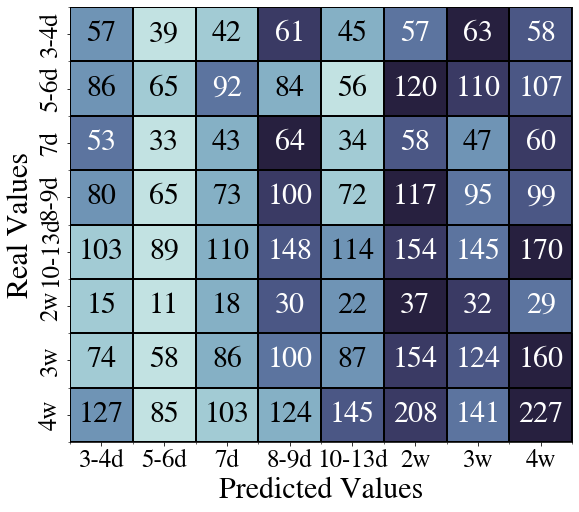

========= LOS_o_65_GRU =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


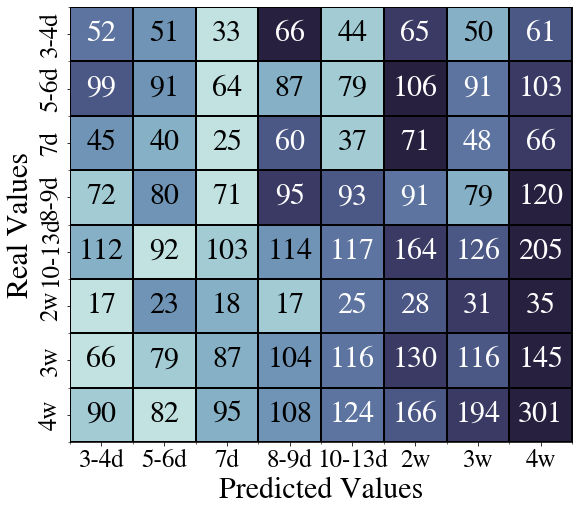

,3-4d,5-6d,7d,8-9d,10-13d,2w,3w,4w,sum_real,sum_pred,...,5-6d,7d,8-9d,10-13d,2w,3w,4w,sum_real,sum_pred,name
3-4d,182,137,73,83,63,79,44,46,707,1465,...,0.017359,0.009250,0.010517,0.007983,0.010010,0.005575,0.005829,0.089584,0.185631,LOS_All_SVM
5-6d,290,278,122,115,102,103,58,84,1152,1565,...,0.035226,0.015459,0.014572,0.012924,0.013051,0.007349,0.010644,0.145971,0.198302,LOS_All_SVM
7d,141,121,75,64,58,61,35,43,598,916,...,0.015332,0.009503,0.008109,0.007349,0.007729,0.004435,0.005449,0.075773,0.116067,LOS_All_SVM
8-9d,204,236,121,122,110,109,66,75,1043,873,...,0.029904,0.015332,0.015459,0.013938,0.013811,0.008363,0.009503,0.132159,0.110618,LOS_All_SVM
10-13d,237,272,167,149,163,161,136,144,1429,827,...,0.034465,0.021161,0.018880,0.020654,0.020400,0.017233,0.018246,0.181069,0.104790,LOS_All_SVM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8-9d,72,80,71,95,93,91,79,120,701,651,...,0.014639,0.012992,0.017383,0.017017,0.016651,0.014456,0.021958,0.128271,0.119122,LOS_o_65_GRU
10-13d,112,92,103,114,117,164,126,205,1033,635,...,0.016834,0.018847,0.020860,0.021409,0.030009,0.023056,0.037511,0.189021,0.116194,LOS_o_65_GRU
2w,17,23,18,17,25,28,31,35,194,821,...,0.004209,0.003294,0.003111,0.004575,0.005124,0.005672,0.006404,0.035499,0.150229,LOS_o_65_GRU
3w,66,79,87,104,116,130,116,145,843,735,...,0.014456,0.015919,0.019030,0.021226,0.023788,0.021226,0.026532,0.154254,0.134492,LOS_o_65_GRU


========= EWS_All_SVM =========


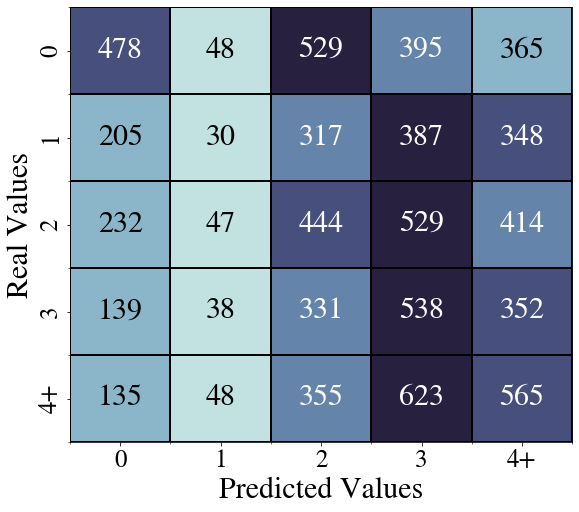

========= EWS_All_XGB =========


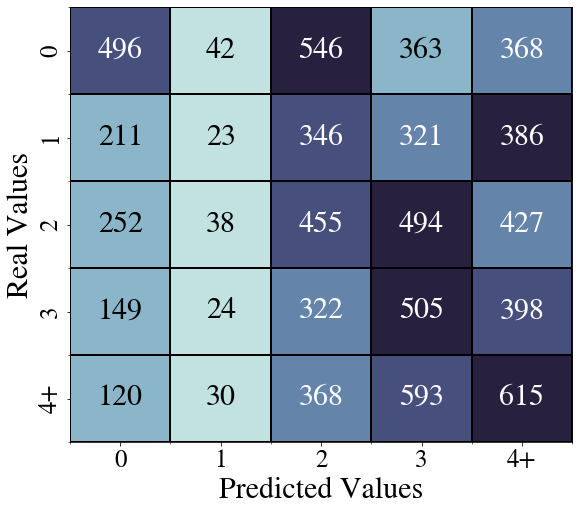

========= EWS_All_LSTM =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


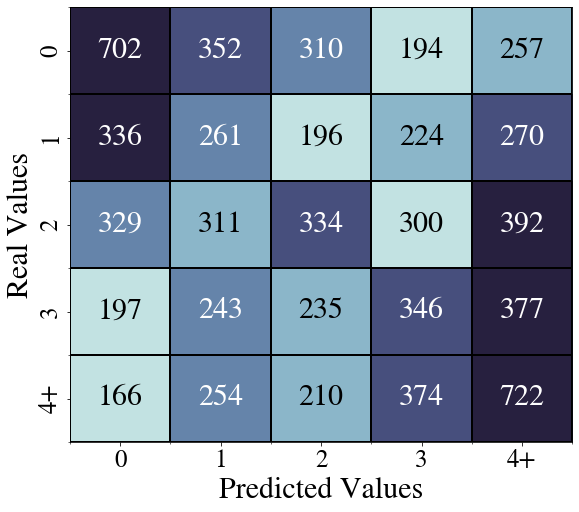

========= EWS_All_GRU =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


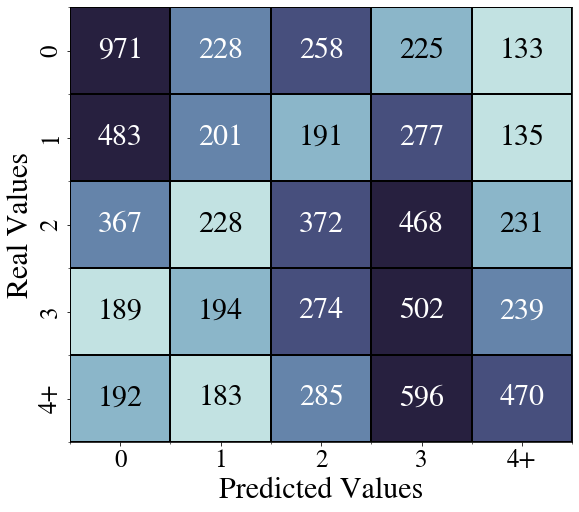

========= EWS_u_65_SVM =========


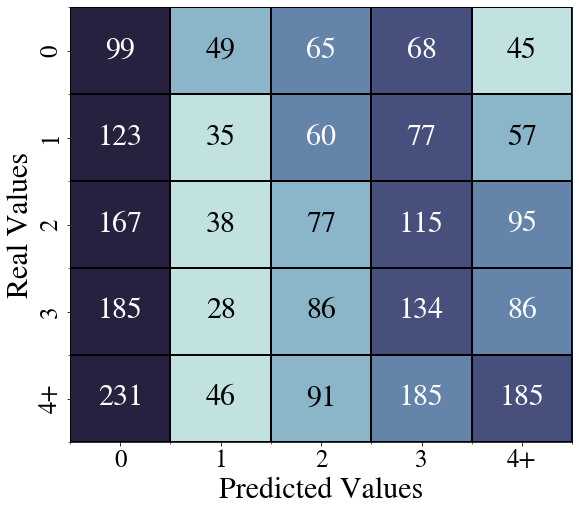

========= EWS_u_65_XGB =========


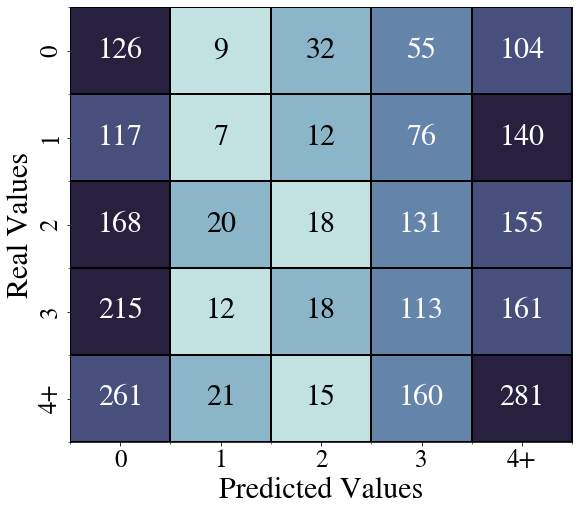

========= EWS_u_65_LSTM =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


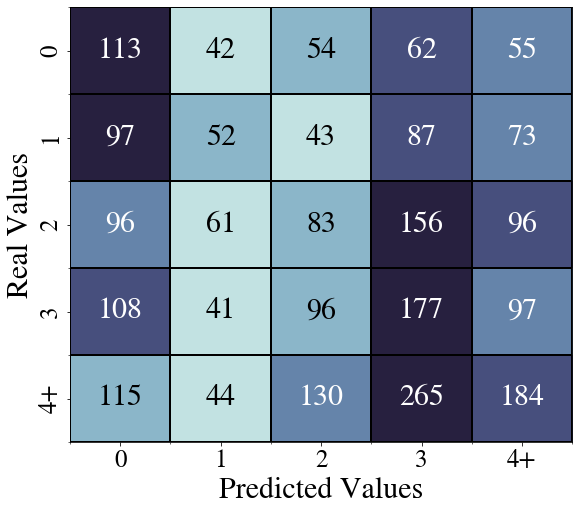

========= EWS_u_65_GRU =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


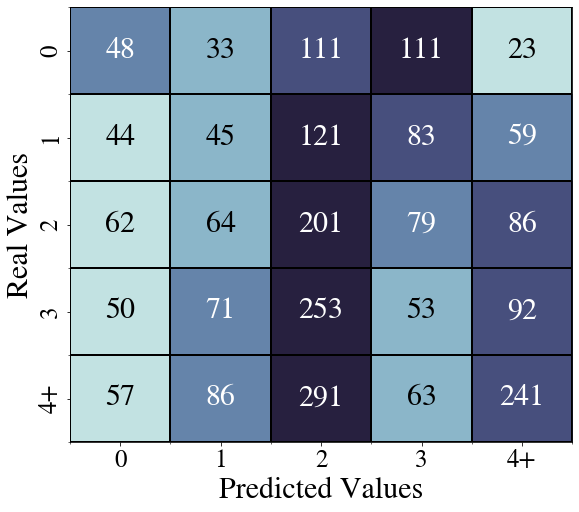

========= EWS_o_65_SVM =========


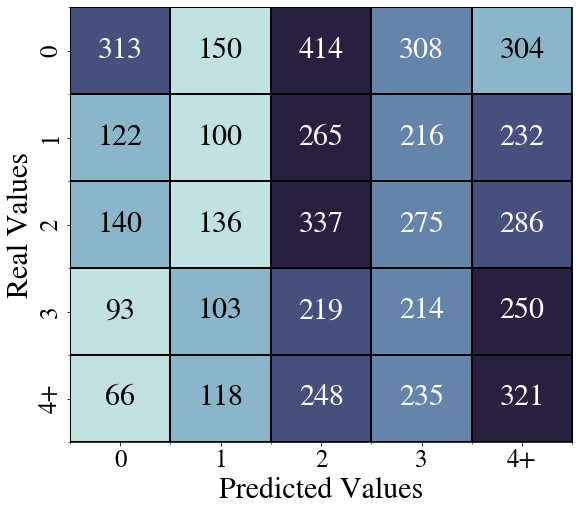

========= EWS_o_65_XGB =========


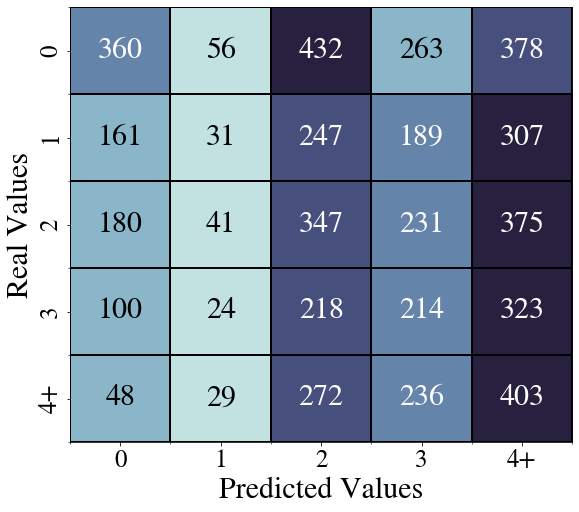

========= EWS_o_65_LSTM =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


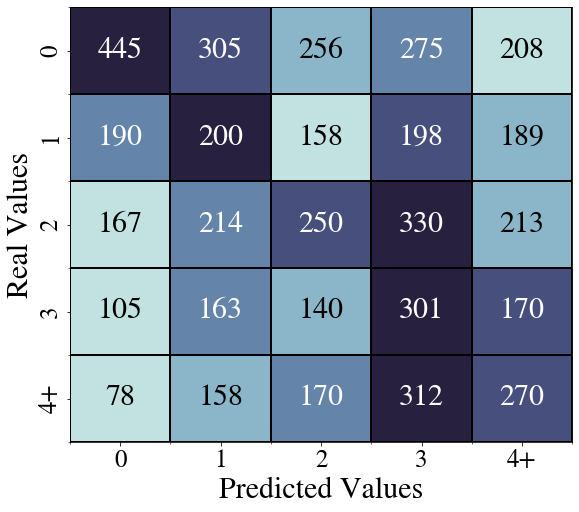

========= EWS_o_65_GRU =========


/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


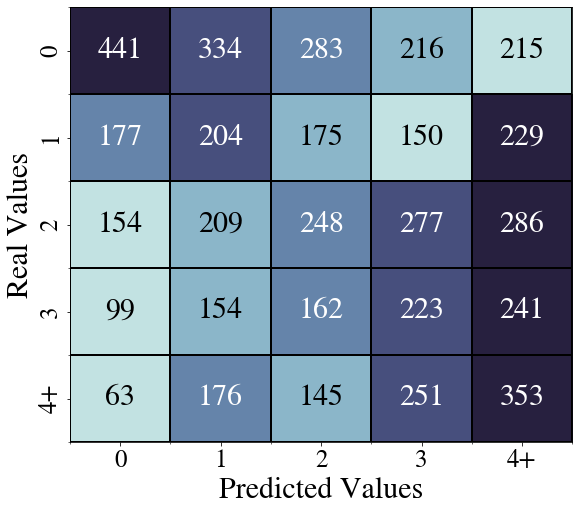

,0,1,2,3,4+,sum_real,sum_pred,0,1,2,3,4+,sum_real,sum_pred,name
0,478,48,529,395,365,1815,1189,0.060568,0.006082,0.067030,0.050051,0.046249,0.229980,0.150659,EWS_All_SVM
1,205,30,317,387,348,1287,211,0.025976,0.003801,0.040167,0.049037,0.044095,0.163077,0.026736,EWS_All_SVM
2,232,47,444,529,414,1666,1976,0.029397,0.005955,0.056260,0.067030,0.052458,0.211100,0.250380,EWS_All_SVM
3,139,38,331,538,352,1398,2472,0.017613,0.004815,0.041941,0.068170,0.044602,0.177141,0.313229,EWS_All_SVM
4+,135,48,355,623,565,1726,2044,0.017106,0.006082,0.044982,0.078941,0.071591,0.218702,0.258996,EWS_All_SVM
0,496,42,546,363,368,1815,1228,0.062848,0.005322,0.069184,0.045996,0.046629,0.229980,0.155601,EWS_All_XGB
1,211,23,346,321,386,1287,157,0.026736,0.002914,0.043842,0.040674,0.048910,0.163077,0.019894,EWS_All_XGB
2,252,38,455,494,427,1666,2037,0.031931,0.004815,0.057653,0.062595,0.054105,0.211100,0.258109,EWS_All_XGB
3,149,24,322,505,398,1398,2276,0.018880,0.003041,0.040801,0.063989,0.050431,0.177141,0.288393,EWS_All_XGB
4+,120,30,368,593,615,1726,2194,0.015205,0.003801,0.046629,0.075139,0.077927,0.218702,0.278003,EWS_All_XGB


In [5]:
dict_label_classes = {'CURB':['Low','Medium','High'], 'EWS':['0','1','2','3','4+'], 'LOS':['3-4d','5-6d','7d','8-9d','10-13d', '2w', '3w', '4w']}
df_results = pd.DataFrame()
for i in range(len(folders)):
    if varbles[i] == 'LOS':
        root_path = path + r'/' + folders[i] + 'LoS_Modelling'
    else:
        root_path = path + r'/' + folders[i] + varbles[i] + '_Modelling'
    df_results = pd.DataFrame()
    for folder in dat_chn:
        folder_path = root_path + r'/' + folder
        files_folder = os.listdir(folder_path)
        
        
        label_classes = dict_label_classes[varbles[i]]
        
        for model in  models_:
            name = varbles[i] + '_' + folder + '_' + model 
            print('=========', name,'=========')
            #if 'CURB_o' in name: continue
            files =[x for x in files_folder if (model in x) and (('.pickle' in x) or ('.h5' in x))]
            if len(files) == 1:
                pkl_path = folder_path + r'/' + files[0]
                X_test, y_test, param, clf = pickle.load(open(pkl_path,'rb'))
                #y_test = np.argmax(y_test, axis=-1)
                y_test_predict = clf.predict(X_test)

                df = results_multiclass_gradientrow(y_test, y_test_predict, y_test_predict,label_classes, 
                                                    save = True, name =  name)
                                                                           #save = True, name = name)
            else:
                h5_path  = folder_path + r'/' + [x for x in files if '.h5' in x][0]
                pkl_path = folder_path + r'/' + [x for x in files if '.pickle' in x][0]
                X_test, y_test, istory = pickle.load(open(pkl_path,'rb'))
                X_test = X_test.astype(float)
                clf = load_model(h5_path, compile = False)

                y_test = np.argmax(y_test, axis=-1)
                y_test_proba   = clf.predict(X_test)
                y_test_predict = clf.predict_classes(X_test)

                df = results_multiclass_gradientrow(y_test, y_test_predict, y_test_proba, label_classes,
                                                    save = True, name = name)
                                            #, save = True, name = name)
            df['sum_real'] = df.sum(axis=1, numeric_only=True)
            df['sum_pred'] = df.sum(axis=0, numeric_only=True)
            df = pd.concat([df, df/len(y_test)], axis = 1)
            df['name'] = name
            df_results = pd.concat([df_results,df])
            
    display(df_results)
    df_results.to_csv('results_' + name + '.csv')

In [6]:
X_test, y_test, istory = pickle.load(open(pkl_path,'rb'))
X_test = X_test.astype(float)
clf = load_model(h5_path, compile = False)

clf

y_test = np.argmax(y_test, axis=-1)
y_test_proba   = clf.predict(X_test)
y_test_proba

array([[0.01067052, 0.13404214, 0.16317475, 0.58736724, 0.10474536],
       [0.44049242, 0.11020692, 0.21026224, 0.13390352, 0.1051349 ],
       [0.01161198, 0.00858435, 0.02749453, 0.05568152, 0.89662766],
       ...,
       [0.12415092, 0.3349805 , 0.2316222 , 0.09743296, 0.2118135 ],
       [0.0660156 , 0.15348433, 0.19382443, 0.4607838 , 0.12589176],
       [0.340934  , 0.2330516 , 0.174392  , 0.13731532, 0.11430714]],
      dtype=float32)

In [7]:
files

['EWS_GRU_ts_h5.pickle', 'EWS_GRU_ts.h5']

In [8]:
pkl_path

'/home/d/dlr10/Documents/02_Statitics_modelling/4_Modelling_TS/11_EWS_Modelling/o_65/EWS_GRU_ts_h5.pickle'

In [9]:
print(sum(sum(np.asarray(df.iloc[:,:8]))))
df.iloc[:,:9]

16395.170905763953


,0,1,2,3,4+,sum_real,sum_pred,0,1
0,441,334,283,216,215,1489,934,0.080695,0.061116
1,177,204,175,150,229,935,1077,0.032388,0.037328
2,154,209,248,277,286,1174,1013,0.028179,0.038243
3,99,154,162,223,241,879,1117,0.018115,0.028179
4+,63,176,145,251,353,988,1324,0.011528,0.032205


In [10]:
pkl_path = r'/home/d/dlr10/Documents/02_Statitics_modelling/4_Modelling_TS/12_LoS_Modelling/u_65/LOS_sta_SVM_h5.pickle'
X_test, y_test, param, clf = pickle.load(open(pkl_path,'rb'))
#y_test = np.argmax(y_test, axis=-1)
y_test_predict_SVM = clf.predict(X_test)

#df = results_multiclass_gradientrow(y_test, y_test_predict, y_test_predict,label_classes, 
#                                    save = False, name =  name)

pkl_path = r'/home/d/dlr10/Documents/02_Statitics_modelling/4_Modelling_TS/12_LoS_Modelling/u_65/LOS_sta_XGB_h5.pickle'
X_test, y_test, param, clf = pickle.load(open(pkl_path,'rb'))
#y_test = np.argmax(y_test, axis=-1)
y_test_predict_XGB = clf.predict(X_test)

#df = results_multiclass_gradientrow(y_test, y_test_predict, y_test_predict,label_classes, 
#                                    save = False, name =  name)

h5_path  = r'/home/d/dlr10/Documents/02_Statitics_modelling/4_Modelling_TS/12_LoS_Modelling/u_65/LOS_GRU_ts.h5'
pkl_path = r'/home/d/dlr10/Documents/02_Statitics_modelling/4_Modelling_TS/12_LoS_Modelling/u_65/LOS_GRU_ts_h5.pickle'
X_test, y_test, istory = pickle.load(open(pkl_path,'rb'))
clf = load_model(h5_path)

y_test = np.argmax(y_test, axis=-1)
y_test_proba   = clf.predict(X_test)
y_test_predict_GRU = clf.predict_classes(X_test)

h5_path  = r'/home/d/dlr10/Documents/02_Statitics_modelling/4_Modelling_TS/12_LoS_Modelling/u_65/LOS_LSTM_ts.h5'
pkl_path = r'/home/d/dlr10/Documents/02_Statitics_modelling/4_Modelling_TS/12_LoS_Modelling/u_65/LOS_LSTM_ts_h5.pickle'
X_test, y_test, istory = pickle.load(open(pkl_path,'rb'))
clf = load_model(h5_path)

y_test = np.argmax(y_test, axis=-1)
y_test_proba   = clf.predict(X_test)
y_test_predict_LSTM = clf.predict_classes(X_test)

/home/d/dlr10/anaconda3/envs/spyder-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [11]:
y_test

array([6, 1, 1, ..., 2, 0, 7])

In [12]:
xgb = np.where((y_test_predict_XGB == y_test) & (y_test_predict_XGB==7))[0]
xgb.shape

(115,)

In [13]:
svm = np.where((y_test_predict_SVM == y_test) & (y_test_predict_SVM==7))[0]
svm.shape

(102,)

In [14]:
GRU = np.where((y_test_predict_GRU == y_test) & (y_test_predict_GRU==7))[0]
GRU.shape

(104,)

In [15]:
LSTM = np.where((y_test_predict_LSTM == y_test) & (y_test_predict_LSTM==7))[0]
LSTM.shape

(171,)

In [16]:
display(np.intersect1d(xgb, svm).shape)
print(len(set(xgb) & set(svm) ))
print(len(set(xgb) & set(GRU) ))
print(len(set(xgb) & set(LSTM) ))
print(len(set(GRU) & set(svm) ))
print(len(set(GRU) & set(LSTM) ))
print(len(set(LSTM) & set(svm) ))




(46,)

46
48
77
38
66
62
